# Question-4

## Part-1

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [44]:
def convolution2d(img, fil, s=1, padding=True):
    img = img.astype(np.float64)
    fil_size = fil.shape[0]
    if padding:
        pad_size = fil_size//2
        img = np.pad(img,((pad_size,pad_size)),mode='constant')

    h,w = img.shape[0],img.shape[1]
    
    rows = (h - fil_size)//s +1
    cols = (w - fil_size)//s +1
    out = np.zeros((rows,cols))
    
    
    for i in range(rows):
        for j in range(cols):
            curr = img[i:i+fil_size,j:j+fil_size]
            out[i,j] = np.sum(np.multiply(curr,fil))
    
    out = np.clip(out,0,255)
    return out.astype(np.uint8) 

In [45]:
def highboost_filtering(img,s=3,w=2):
    fil = np.ones((s,s))
    fil  = -1*fil
    fil[s//2,s//2] = w + s*s - 1
    
    o = np.zeros(img.shape)
    for i in range(3):
        o[:,:,i] = convolution2d(img[:,:,i],fil)
    
    return o.astype(np.uint8)

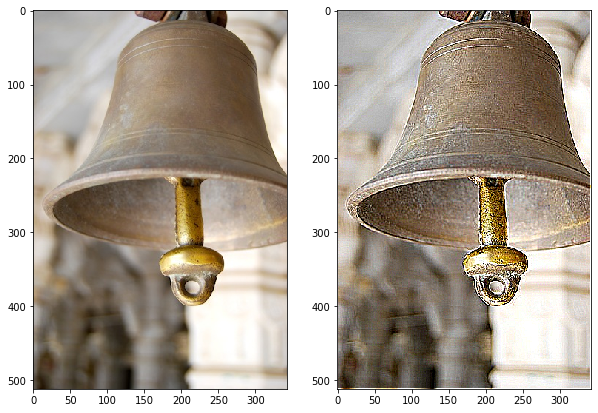

In [53]:
img = cv2.imread('../A2_resources/bell.jpg')
out = highboost_filtering(img,3,1)

img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
out_rgb = cv2.cvtColor(out,cv2.COLOR_BGR2RGB)
fig = plt.figure()
fig.set_size_inches(10, 10)
fig.add_subplot(121)
plt.imshow(img_rgb)
plt.subplot(1,2,2)
plt.imshow(out_rgb)
plt.show()

When the weight factor is zero we get the *high pass component of the image(edges)*. When we increase the weight component, the image starts to get added to the highpass component. At w = 1 the results are perfect. We can see the edges clearly and the image is clear as well. From w = 3, the brightness of the image dominates and we won't be clearly see the output.

## Part-2

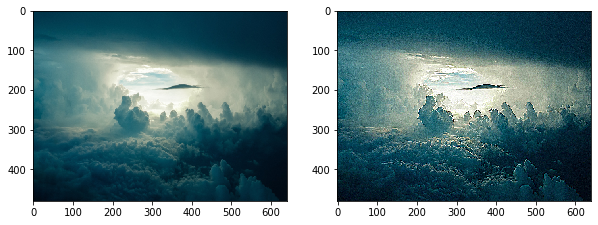

In [41]:
img = cv2.imread('../A2_resources/gt_sky.png')
out = highboost_filtering(img,3,1)

img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
out_rgb = cv2.cvtColor(out,cv2.COLOR_BGR2RGB)
fig = plt.figure()
fig.set_size_inches(10, 10)
fig.add_subplot(121)
plt.imshow(img_rgb)
plt.subplot(1,2,2)
plt.imshow(out_rgb)
plt.show()

## Part-3

+ In Bilateral Filtering we try to preserve edges and smoothen the image at homogeneous regions. But in hightboost filtering we enhance the edges present in the image without disturbing the homogeneous regions(sum of values in kernel = 0). By this we can leave smooth areas untouched. 
+ In bilateral we use the information of the image and then figure out the filter. But in highboost filtering we use laplacian filters and the sum the output and input image(weighted). 